In [1]:
import torch
import src.datasets as my_datasets
from src.dataset_bundle import *
import pandas as pd
from wilds.common.data_loaders import get_eval_loader
from src.server import *
import matplotlib.pyplot as plt
import numpy as np

/mnt/disk1/anaconda3/envs/ndg2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/mnt/disk1/anaconda3/envs/ndg2/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /mnt/disk1/anaconda3/envs/ndg2/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefINS2_6SymIntEEENS2_8optionalINS2_10ScalarTypeEEENS6_INS2_6LayoutEEENS6_INS2_6DeviceEEENS6_IbEENS6_INS2_12MemoryFormatEEE
  warn(f"Failed to load image Python extension: {e}")


In [2]:
dataset = my_datasets.PACS(version='1.0', root_dir='./data', download=True, split_scheme='fl_0_v1_acsp')
ds_bundle = eval("PACS")(dataset, 512, probabilistic=False)

acc


FileNotFoundError: [Errno 2] No such file or directory: 'data/pacs_v1.0/fl_0_v1_acsp.csv'

In [ ]:
a = [True, False, False ,True]
b = np.where(a)[0]

In [ ]:
total_subset = dataset.get_subset('train', transform=ds_bundle.train_transform)

In [ ]:
test_dt = []
for split in dataset.split_names:
    if split != 'train':
        print(split)
        ds = dataset.get_subset(split, transform=ds_bundle.test_transform)
        dl = get_eval_loader(loader='standard', dataset=ds, batch_size=32, pin_memory=True)
        test_dt.append(dl)

val
test
id_val
id_test


In [ ]:
training_datasets = NonIIDSplitter(num_shards=5, iid=0.1, seed=42).split(dataset.get_subset('train'), ds_bundle.groupby_fields, transform=ds_bundle.train_transform)

2


In [ ]:
config = {
        "mp": False,
        "data_path": "./data/",
        "algorithm": "ProposalServer",
        "fraction": 0.2,
        "num_rounds": 50
    }

server = eval("FedAvg")(42, 'abvc', 'cuda', ds_bundle, config)

In [ ]:
server.setup_model('./data/models/iid=0.1-split=ac-p-s-nclient=10-nround=50-seed=42/pacs_bestmodel_round24.pth', 0)

tensor(0)


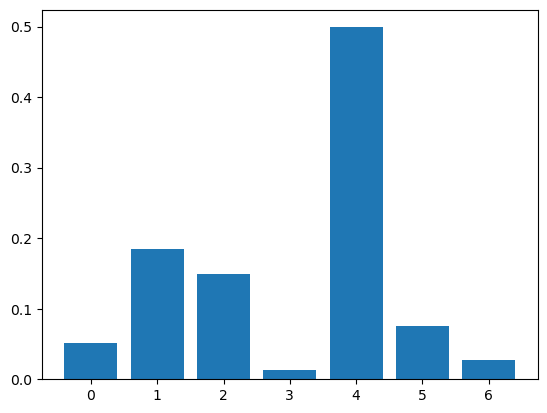

tensor(0)


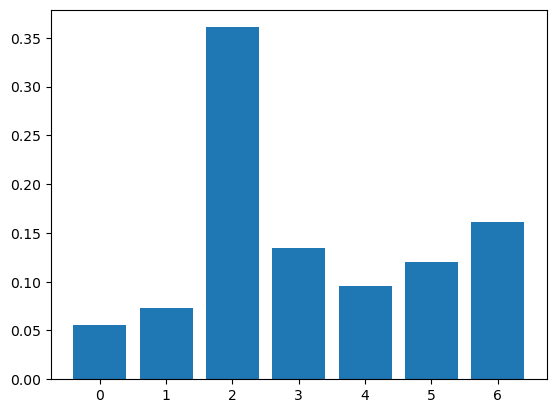

tensor(0)


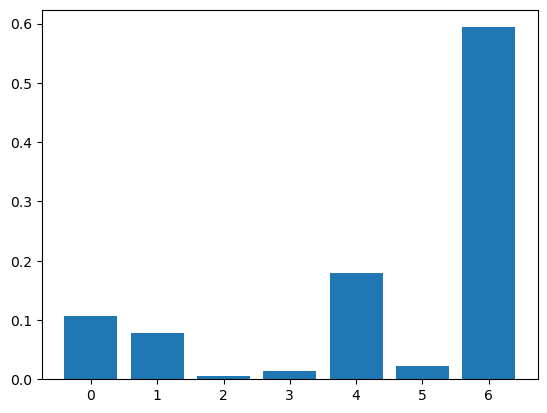

tensor(0)


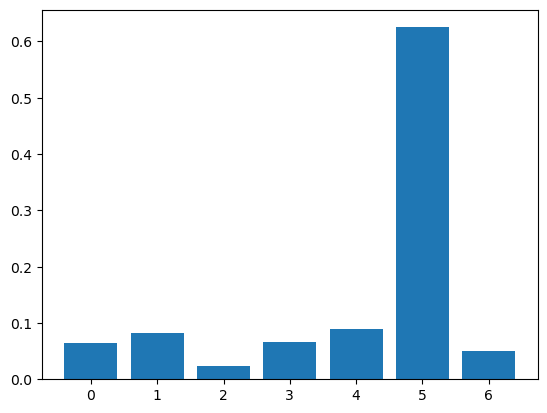

tensor(0)


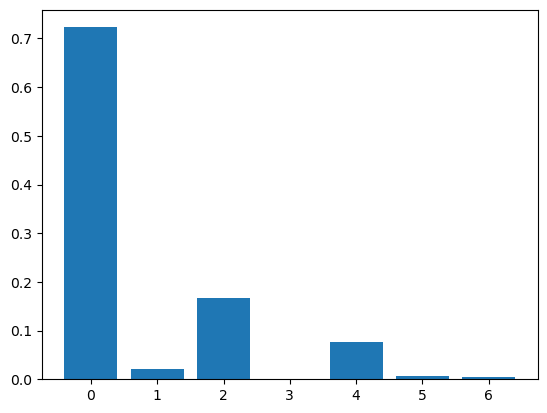

tensor(0)


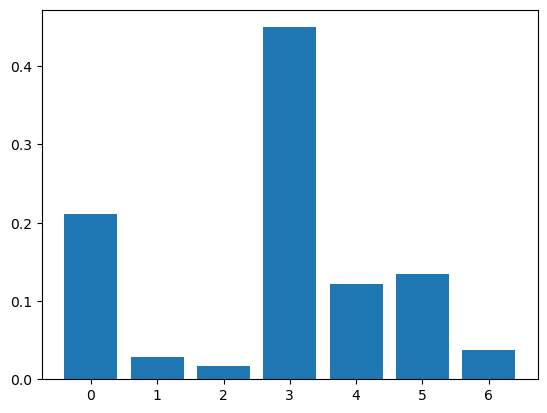

tensor(0)


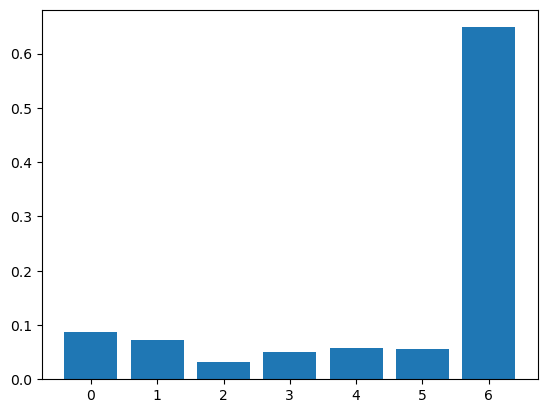

tensor(0)


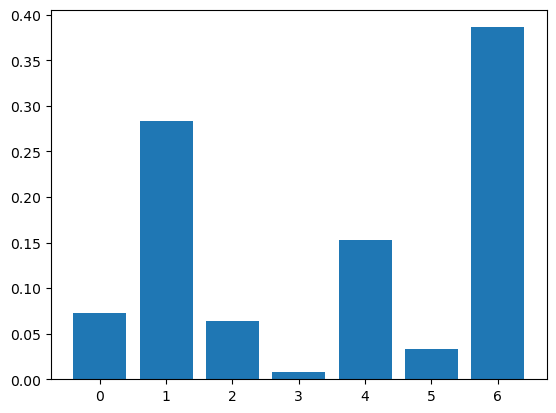

tensor(0)


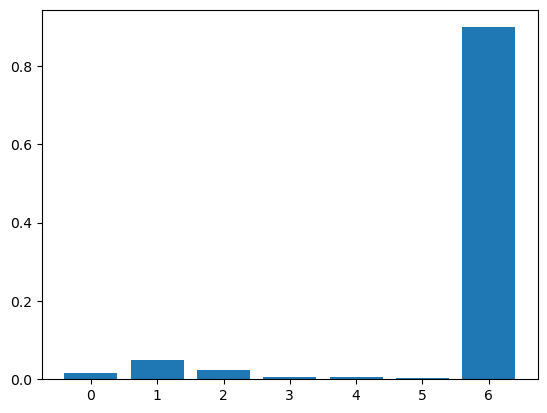

tensor(0)


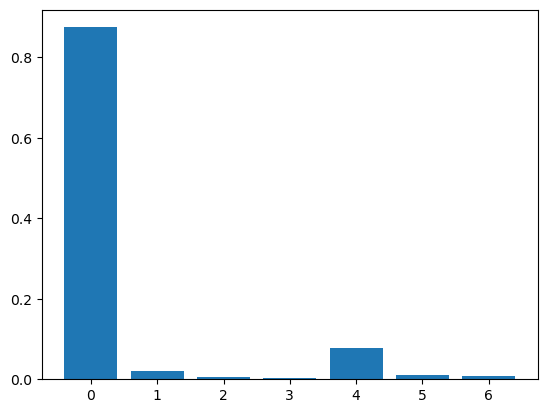

tensor(0)


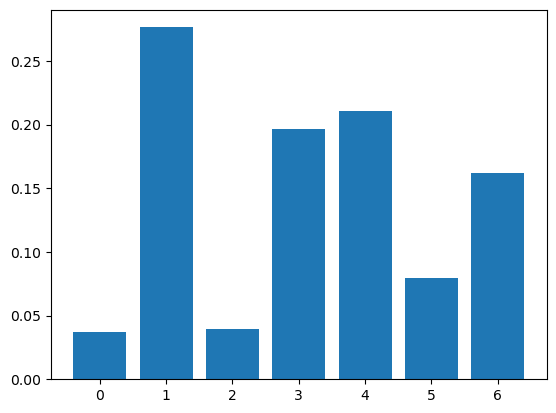

tensor(0)


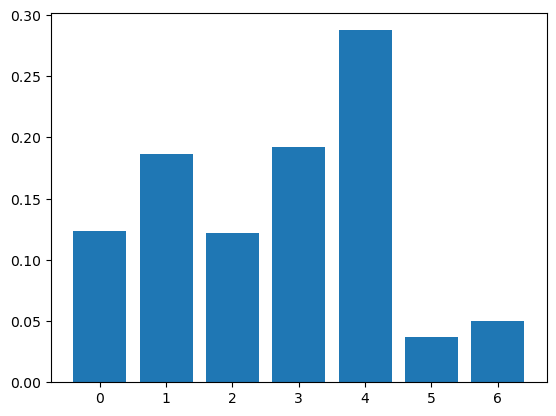

tensor(0)


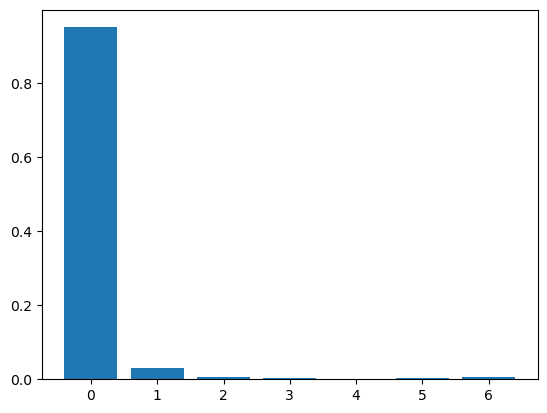

tensor(0)


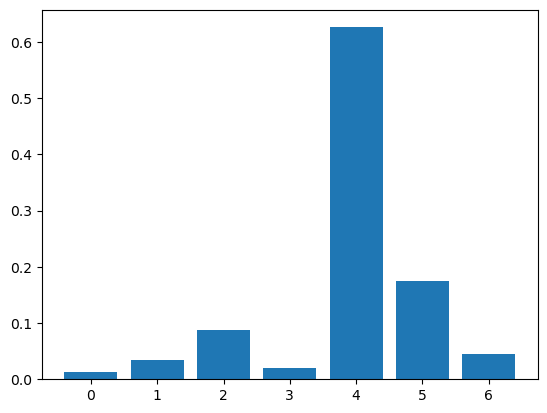

tensor(0)


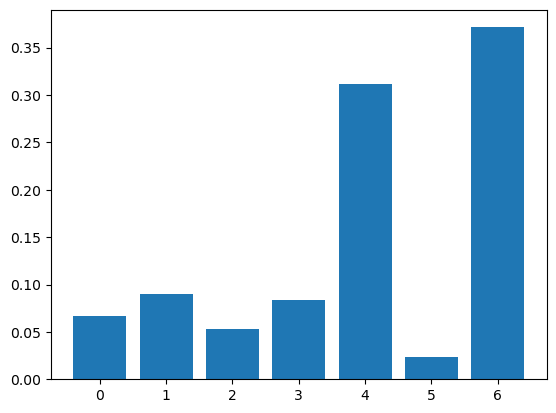

tensor(0)


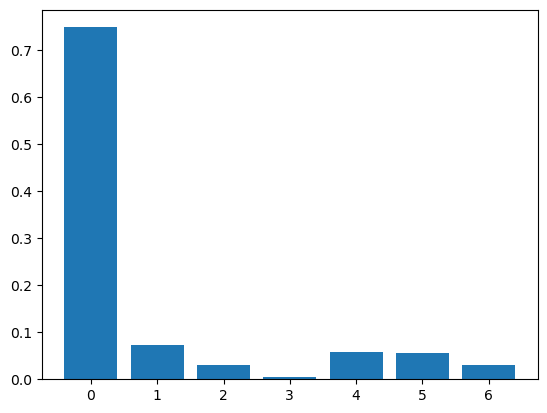

tensor(0)


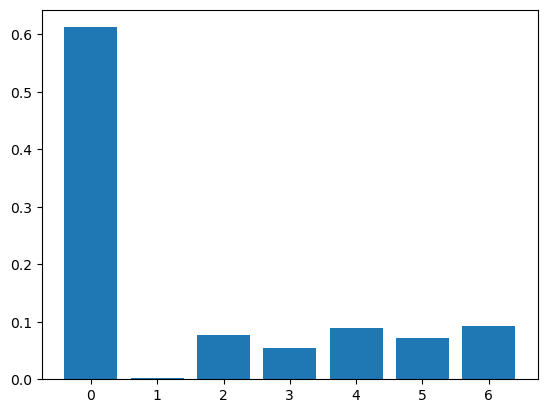

tensor(1)


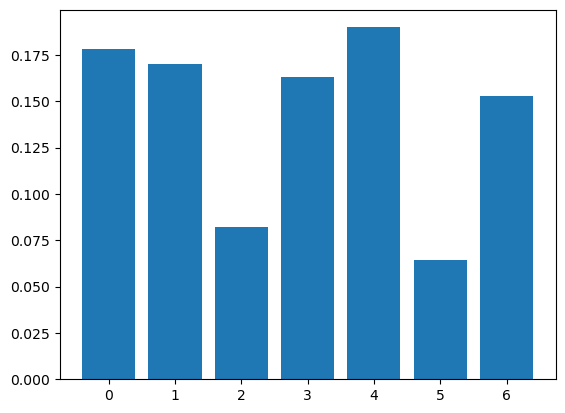

tensor(1)


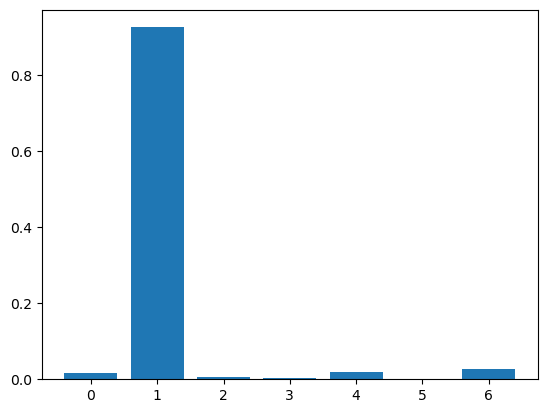

tensor(1)


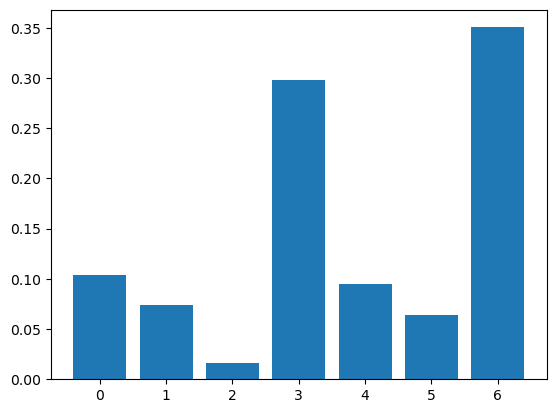

tensor(1)


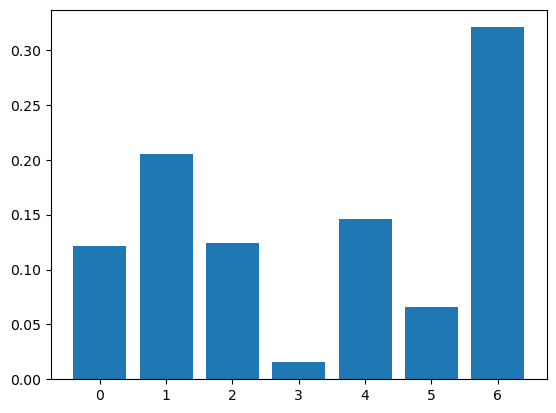

tensor(1)


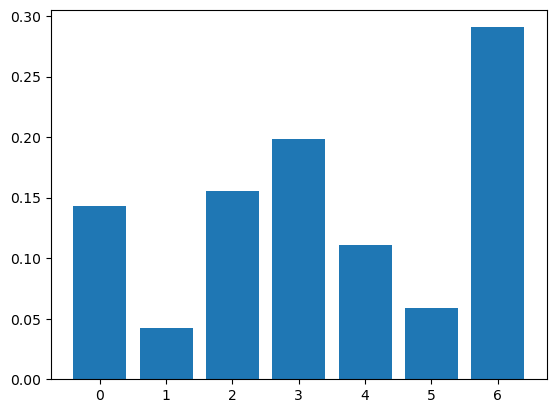

tensor(1)


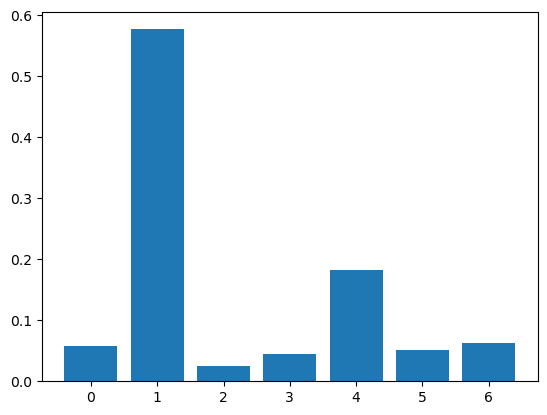

tensor(1)


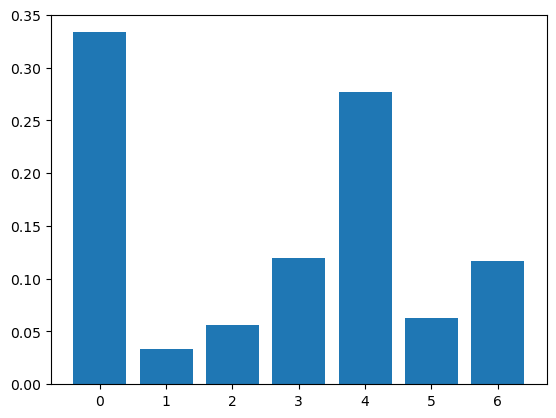

tensor(1)


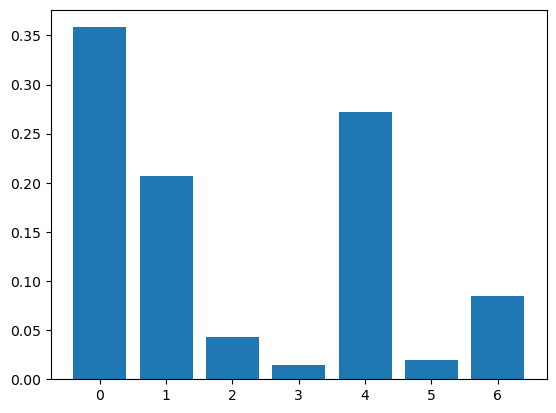

tensor(1)


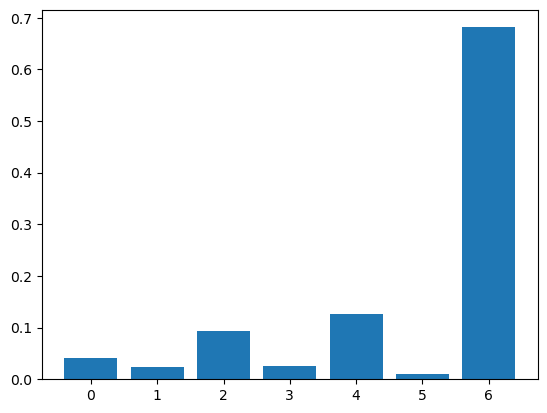

tensor(1)


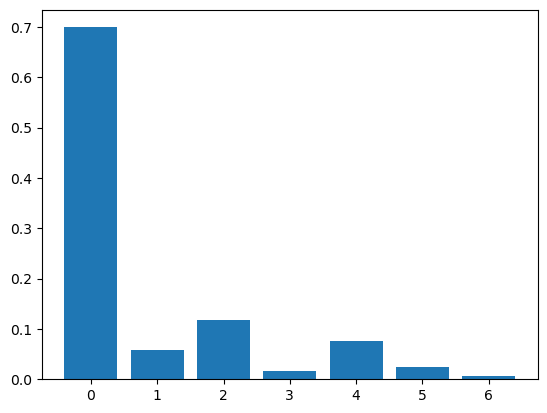

tensor(1)


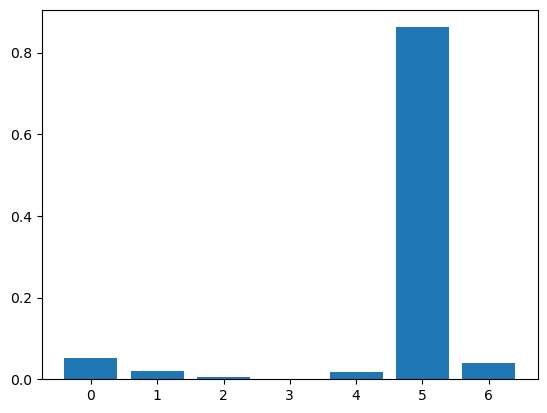

tensor(1)


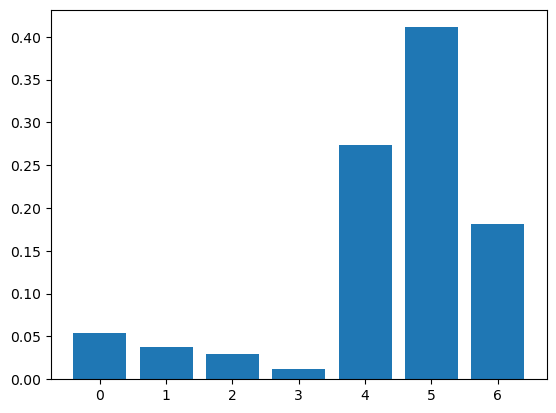

tensor(1)


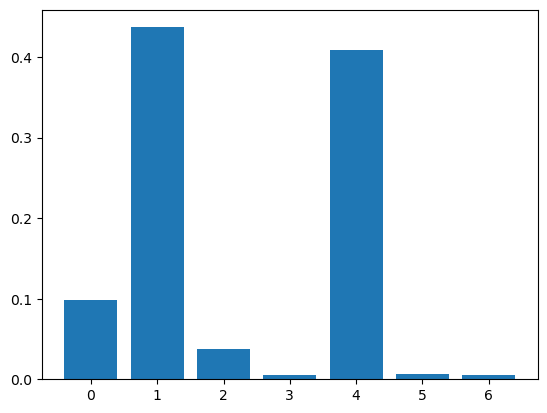

tensor(1)


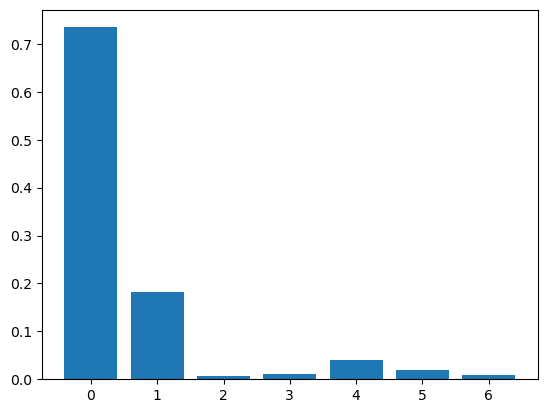

tensor(1)


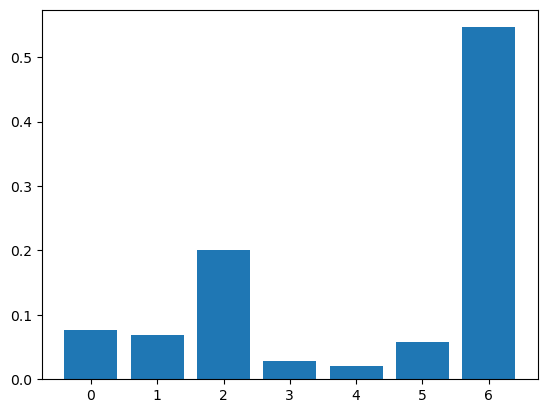

In [ ]:
softmax = torch.nn.Softmax(dim=1)
for idx, batch in enumerate(test_dt[2]):
    if idx == 3:
        data, labels, meta_batch = batch[0], batch[1], batch[2]
        prediction = server.model(data)
        # prediction = torch.argmax(prediction, dim=-1)
        # y_pred = prediction
        pred = softmax(prediction)
        for i in range(32):
            print(labels[i])
            plt.bar(np.arange(7), pred[i].detach().cpu().numpy())
            plt.show();
        

domain    2   3
y              
0       179  16
1       183  22
2       140   8
3        62  11
4       136  11
5       111   1
6       189   3
--------
domain    2   3
y              
0       149  15
1       207  13
2       161  14
3        54  11
4       140  14
5       127   0
6       162   4
--------
domain   2    3
y              
0        7  221
1        7  215
2        5  221
3        2  190
4       10  224
5        5   23
6        6   44
--------
domain   2    3
y              
0        9  231
1        7  205
2        2  227
3        1  160
4        6  242
5       12   26
6        5   47
--------
domain   2    3
y              
0        7  216
1       11  214
2        6  212
3        3  178
4        2  248
5        6   22
6        7   48
--------


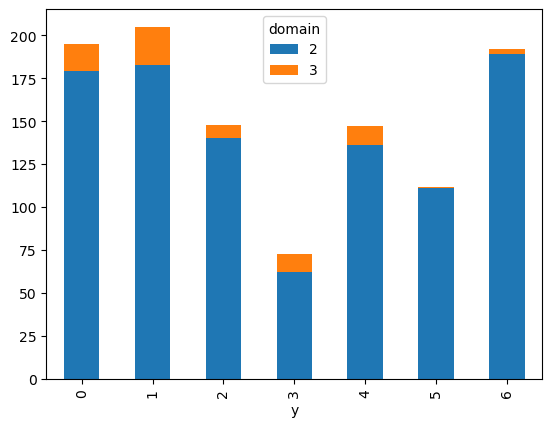

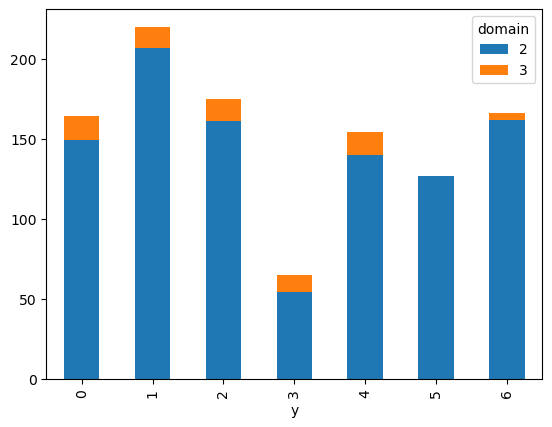

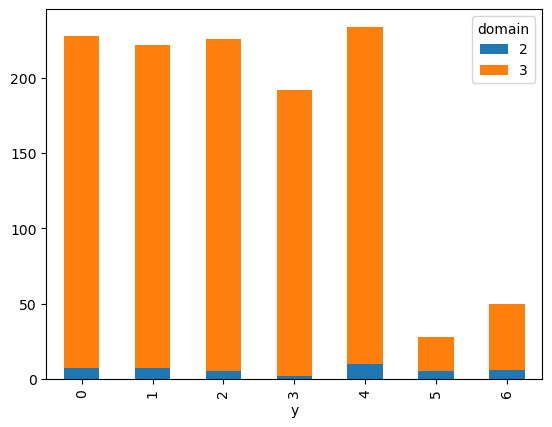

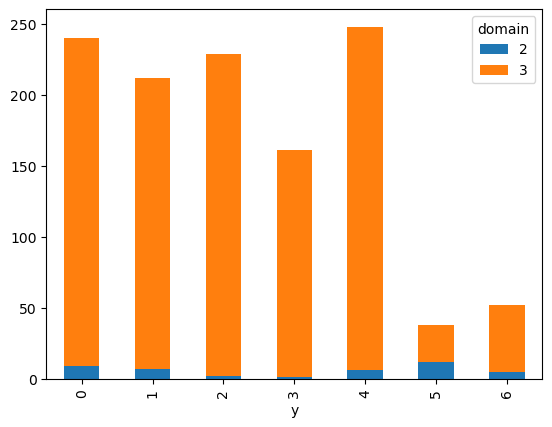

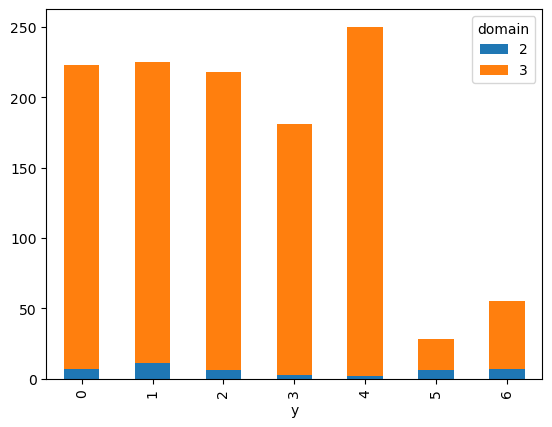

In [ ]:
for idx, training_data in enumerate(training_datasets):
    metadata = training_data.metadata_array
    domains = torch.unique(metadata[:, 0])
    metadata = pd.DataFrame(metadata.numpy())
    metadata.columns = ['domain', 'y', 'x', 'source']
    results = metadata.groupby(['domain', 'y']).size().reset_index(name='count')
    converted_result = pd.pivot_table(results, values='count', index='y', columns=['domain']).fillna(0).astype(int)
    print(converted_result)
    converted_result.plot.bar(stacked=True)
    print('--------')

domain    1
y          
0       379
1       255
2       285
3       184
4       201
5       295
6       449
--------
domain    0
y          
0       189
1       202
2       182
3       186
4       199
5       280
6       432
--------
domain   2   3
y             
0       19  35
1       19  35
2       15  34
3        6  28
4       15  38
5       13   4
6       17   6
--------
domain   2   3
y             
0       19  38
1       23  36
2       17  37
3        7  30
4       15  39
5       14   4
6       19   8
--------


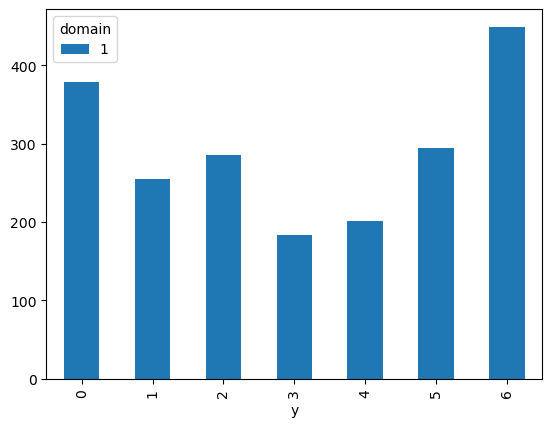

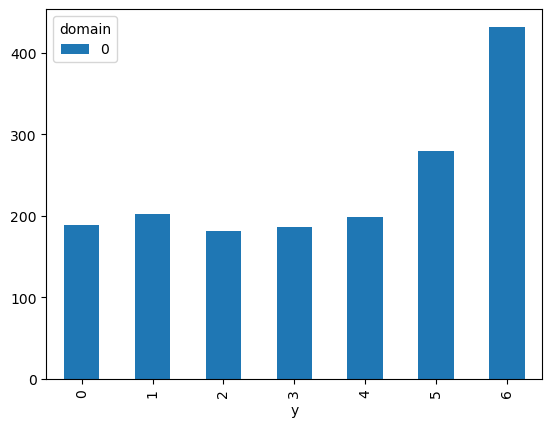

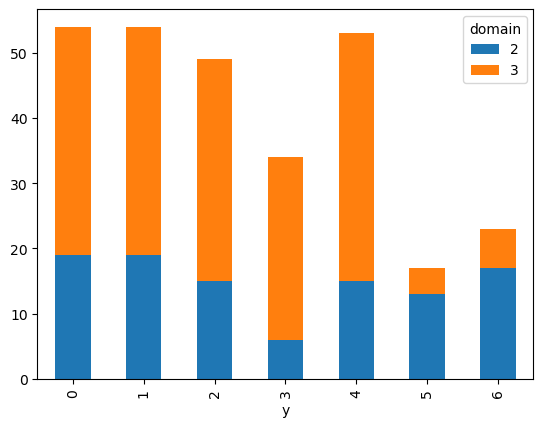

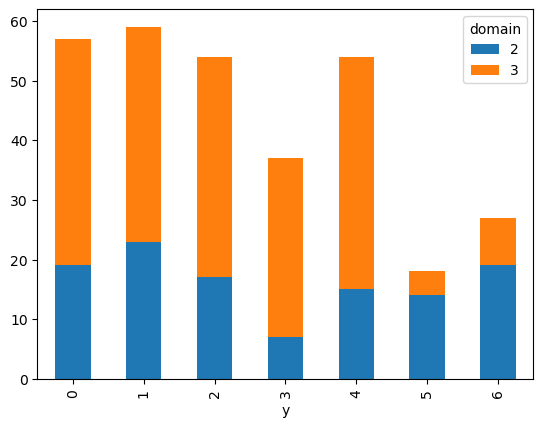

In [ ]:
for idx, test_data in enumerate(test_dt):
    metadata = test_data.metadata_array
    domains = torch.unique(metadata[:, 0])
    metadata = pd.DataFrame(metadata.numpy())
    metadata.columns = ['domain', 'y', 'x', 'source']
    results = metadata.groupby(['domain', 'y']).size().reset_index(name='count')
    converted_result = pd.pivot_table(results, values='count', index='y', columns=['domain']).fillna(0).astype(int)
    print(converted_result)
    converted_result.plot.bar(stacked=True)
    print('--------')